In [25]:
import json
with open('/home/data/coco/annotations/densepose_train2014.json', encoding='utf-8') as fr:
    result1 = json.load(fr)

In [26]:
with open('/home/data/coco/annotations/person_keypoints_train2014.json', encoding='utf-8') as fr:
    result2 = json.load(fr)

In [27]:
result1.keys()

dict_keys(['images', 'annotations', 'categories'])

In [28]:
result2.keys()

dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])

In [33]:
result1['annotations'][0]['bbox']

[387, 71.1, 145, 322]

In [35]:
for i in result1['annotations']:
    if i['image_id']==524297:
        print(i['id'])
        print(i['bbox'])

428468
[376.07, 114.71, 93.06, 240.85]
454191
[177.67, 105.71, 106.05, 228.78]
481271
[329.7, 140.59, 9.02, 26.19]


In [1]:
import os
from os.path import join
import sys
import json
import numpy as np
def coco_extract(dataset_path="/home/data/coco", openpose_path='', out_path="/home/project/my_spin/data/dataset_extras"):
    # read the coco data to extract the openpose data
    n=0
    tmp = np.load('/home/project/my_spin/data/dataset_extras/coco_2014_train.npz') 
    openpose_names = tmp['imgname']
    openpose_data = tmp['openpose']
    # convert joints to global order
    joints_idx = [19, 20, 21, 22, 23, 9, 8, 10, 7, 11, 6, 3, 2, 4, 1, 5, 0]

    # bbox expansion factor
    scaleFactor = 1.2

    # structs we need
    imgnames_, scales_, centers_, parts_, openposes_ = [], [], [], [], []

    # json annotation file
    json_path = os.path.join(dataset_path,
                             'annotations',
                             'densepose_train2014.json')
    json_data = json.load(open(json_path, 'r'))

    imgs = {}
    for img in json_data['images']:
        imgs[img['id']] = img

    for annot in json_data['annotations']:
        # keypoints processing
        keypoints = annot['keypoints']
        keypoints = np.reshape(keypoints, (17,3))
        keypoints[keypoints[:,2]>0,2] = 1
        # check if all major body joints are annotated
        if sum(keypoints[5:,2]>0) < 12:
            continue
        # image name
        image_id = annot['image_id']
        img_name = str(imgs[image_id]['file_name'])
        img_name_full = join('train2014', img_name)
        # keypoints
        part = np.zeros([24,3])
        part[joints_idx] = keypoints
        # scale and center
        bbox = annot['bbox']
        center = [bbox[0] + bbox[2]/2, bbox[1] + bbox[3]/2]
        scale = scaleFactor*max(bbox[2], bbox[3])/200
        # read openpose detections
        # json_file = os.path.join(openpose_path, 'coco',
        #     img_name.replace('.jpg', '_keypoints.json'))
        # openpose = read_openpose(json_file, part, 'coco')
        openpose = find_openpose_data(image_id, openpose_names, openpose_data)
        # limit the training data to single person
        if openpose.shape != (25,3):
            continue
        # store data
        imgnames_.append(img_name_full)
        centers_.append(center)
        scales_.append(scale)
        parts_.append(part)
        openposes_.append(openpose)
        n+=1
        print('{} done'.format(n))
        

    # store the data struct
    if not os.path.isdir(out_path):
        os.makedirs(out_path)
    out_file = os.path.join(out_path, 'densepose_coco_single_train.npz')
    np.savez(out_file, imgname=imgnames_,
                       center=centers_,
                       scale=scales_,
                       part=parts_,
                       openpose=openposes_)

def find_openpose_data(imgname, openpose_names, openpose_data):
    idx = np.where(openpose_names=='train2014/COCO_train2014_{:0>12d}.jpg'.format(imgname))
    #print(imgname)
    assert(len(idx)==1)
    #print(idx)
    data = openpose_data[idx].squeeze()
    #print(data.shape)
    return data

In [2]:
coco_extract()

6162 done
6163 done
6164 done
6165 done
6166 done
6167 done
6168 done
6169 done
6170 done
6171 done
6172 done
6173 done
6174 done
6175 done
6176 done
6177 done
6178 done
6179 done
6180 done
6181 done
6182 done
6183 done
6184 done
6185 done
6186 done
6187 done
6188 done
6189 done
6190 done
6191 done
6192 done
6193 done
6194 done
6195 done
6196 done
6197 done
6198 done
6199 done
6200 done
6201 done
6202 done
6203 done
6204 done
6205 done
6206 done
6207 done
6208 done
6209 done
6210 done
6211 done
6212 done
6213 done
6214 done
6215 done
6216 done
6217 done
6218 done
6219 done
6220 done
6221 done
6222 done
6223 done
6224 done
6225 done
6226 done
6227 done
6228 done
6229 done
6230 done
6231 done
6232 done
6233 done
6234 done
6235 done
6236 done
6237 done
6238 done
6239 done
6240 done
6241 done
6242 done
6243 done
6244 done
6245 done
6246 done
6247 done
6248 done
6249 done
6250 done
6251 done
6252 done
6253 done
6254 done
6255 done
6256 done
6257 done
6258 done
6259 done
6260 done
6261 done


In [10]:
tmp = np.load('/home/project/my_spin/data/dataset_extras/coco_2014_train.npz') 
openpose_names = tmp['imgname']
openpose_data = tmp['openpose']

In [32]:
for i in openpose_data:
    if i.shape!=(25,3):
        print(i.shape)

In [17]:
np.where(openpose_names=='train2014/COCO_train2014_000000524297.jpg')

(array([5203, 8633]),)

In [21]:
!pip install pillow

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [23]:
from PIL import Image

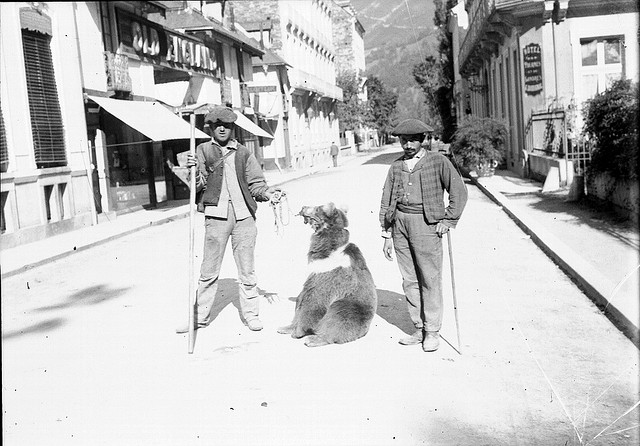

In [24]:
Image.open("/home/data/coco/train2014/COCO_train2014_000000524297.jpg")

In [51]:
tmp = np.load('/home/project/my_spin/data/dataset_extras/densepose_coco_single_train.npz',allow_pickle=True) 
openpose_names = tmp['imgname']
openpose_data = tmp['openpose']

In [52]:
openpose_data.shape

(8161, 25, 3)

In [53]:
openpose_names.shape

(8161,)